<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0613_25%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5BOR%2CAND%2CNANDXOR%2Cstep_func%2Csigmoid%2Crelu%2Csoftmax%2Cidentity_function%2Cinit_network%2Cforward%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def OR(x1 , x2):
    x= np.array([x1, x2])
    w = np.array([1,1])
    b = -0.5
    z1 = np.dot(x,w)+b
    if z1 <=0:
        return 0
    else:
        return 1

In [ ]:
print(OR(0,1))
print(OR(1,0))
print(OR(0,0))
print(OR(1,1))

1
1
0
1


$$
b_1 + w_1x_1 + w_2x_2
$$
$$
-0.5 + x_1+ x_2 <= 0, =>0
$$
$$
-0.5 + x_1 + x_2 > 0, =>1
$$
$$
x_2 <= -x_1 +0.5 , => 0
$$
$$
x_2 > -x_1 +0.5, => 1
$$

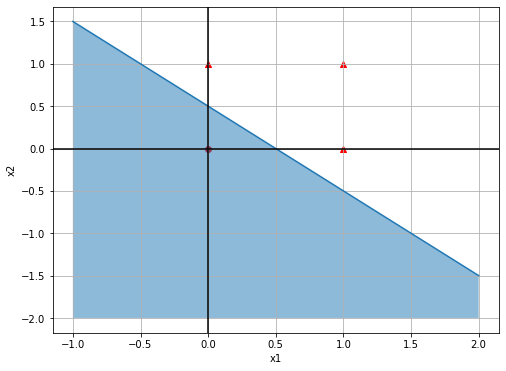

In [ ]:
x1 = np.linspace(-1,2,20)
x2 = -x1+0.5

plt.figure(figsize = (8,6))
plt.plot(x1, x2)

plt.axvline(x=0, color = 'k')
plt.axhline(y =0, color = 'k')
plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.fill_between(x1,x2,-2,alpha=0.5)#y값에서 y축의 -2까지의 값들에 대해 색깔을 칠해준다.    alpha 투명도
plt.grid()
plt.show()

In [ ]:
def AND(x1, x2):
    x= np.array([x1, x2])
    w = np.array([1,1])
    b = -1.2
    z1 = np.dot(x,w)+b
    if z1 <=0:
        return 0
    else:
        return 1

In [ ]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [ ]:
def NAND(x1, x2):
    x= np.array([x1, x2])
    w = np.array([-1,-1])
    b = 1.2
    z1 = np.dot(x,w)+b
    if z1 <=0:
        return 0
    else:
        return 1

In [ ]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


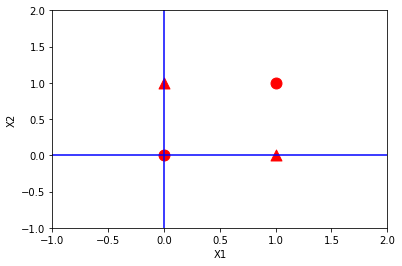

In [ ]:
x1 = np.arange(-1,3,0.1)
x2 = -x1+0.5


plt.axvline(x = 0, color = 'b') #draw x = 0 axes
plt.axhline(y = 0, color = 'b') #draw y = 0 axes
plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter([0,1],[0,1],marker='o',color='r',s=120)
plt.scatter([1,0],[0,1,],marker='^',color='r',s=120)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [ ]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


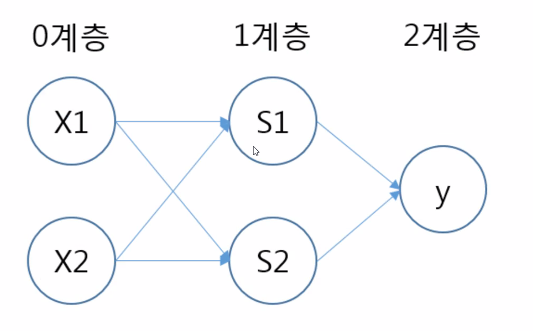

0계층에서는 선형분류이 되는데

1계층에서는 비선형분류가 된다.

AND, OR 은 단충 퍼셉트론

XOR은 2층 퍼셉트론

2층 퍼셉트론 서술
- 0층의 두 뉴런이 입력신호를 받아 1층의 뉴런으로 신호를 보냄
- 1층의 뉴런이 2층의 뉴런으로 신호를 보내고 2층의 뉴런은 이 입력 신호를 바탕으로 y를 출력

단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현 가능



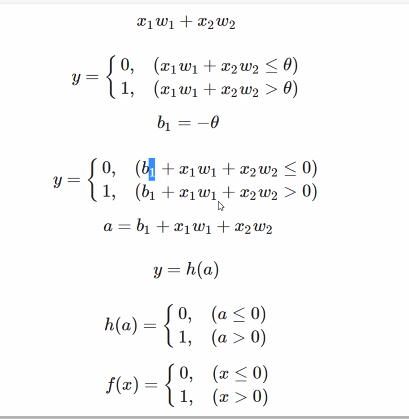

$$
f(x) 와 h(a)는 활성화 함수 입니다. 
$$
입력 신호의 총합 (a)를 출력 신호 f(x)로 변환하는 함수

$$
x_1w_1 + x_2w_2 \leq \theta
$$
$$
x_1w_1 + x_2w_2 - \theta \leq 0
$$

In [ ]:
#f(x) 구하기 = 이게 바로 step_func이다
def step_func(x):
    if x>0:
        return 1
    else:
        return 0

In [ ]:
step_func(0.1), step_func(-0.1)

(1, 0)

In [ ]:
x = np.arange(-5, 5, 0.1)

In [ ]:
step_func(x)    #배열에 맞지 않아 오류

ValueError: ignored

In [ ]:
#고쳐 보자
def step_func(x):
    y = x>0     #True,False로 가득찬 배열이 반환됨
    y = y.astype(int)   #True 1 False는 0으로 변환
    return y

In [ ]:
step_func(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

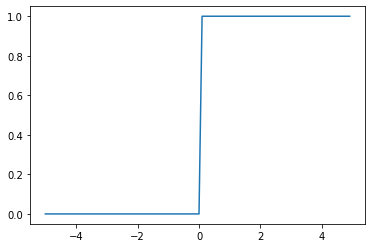

In [ ]:
plt.plot(x, step_func(x))   #계단형식으로 나타남

# 2

$$
h(x) = 1/1+e-x
$$

신경망 생성 함수

In [ ]:
#위 함수의 이름은 sigmoid(s자 모양의 함수)
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x = np.arange(-10.,10.,0.1)

In [ ]:
sigmoid(x)

array([4.53978687e-05, 5.01721647e-05, 5.54485247e-05, 6.12797396e-05,
       6.77241496e-05, 7.48462275e-05, 8.27172229e-05, 9.14158739e-05,
       1.01029194e-04, 1.11653341e-04, 1.23394576e-04, 1.36370327e-04,
       1.50710358e-04, 1.66558065e-04, 1.84071905e-04, 2.03426978e-04,
       2.24816770e-04, 2.48455082e-04, 2.74578156e-04, 3.03447030e-04,
       3.35350130e-04, 3.70606141e-04, 4.09567165e-04, 4.52622223e-04,
       5.00201107e-04, 5.52778637e-04, 6.10879359e-04, 6.75082731e-04,
       7.46028834e-04, 8.24424686e-04, 9.11051194e-04, 1.00677082e-03,
       1.11253603e-03, 1.22939862e-03, 1.35851995e-03, 1.50118226e-03,
       1.65880108e-03, 1.83293894e-03, 2.02532039e-03, 2.23784852e-03,
       2.47262316e-03, 2.73196076e-03, 3.01841632e-03, 3.33480731e-03,
       3.68423990e-03, 4.07013772e-03, 4.49627316e-03, 4.96680165e-03,
       5.48629890e-03, 6.05980149e-03, 6.69285092e-03, 7.39154134e-03,
       8.16257115e-03, 9.01329865e-03, 9.95180187e-03, 1.09869426e-02,
      

In [ ]:
y1 = sigmoid(x)

In [ ]:
y2 = step_func(x)

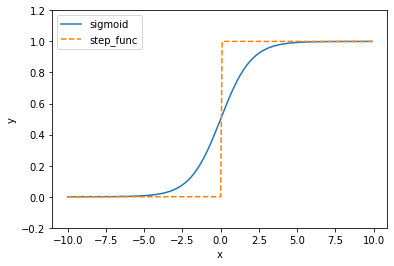

In [ ]:
plt.plot(x,y1, label = 'sigmoid')
plt.plot(x, y2 ,linestyle= '--', label = 'step_func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-0.2,1.2)
plt.show()

In [ ]:
x = np.array([-2.0, -1.0, 1.0, 2.0])

In [ ]:
sigmoid(x)

array([0.11920292, 0.26894142, 0.73105858, 0.88079708])

y = h(h(h(x))) = a*(b*(c(x))

= a* b* c (x)

= C * x

ReLU(Rectified Linear Unit): 입력이 0을 넘으면 그 입력 그대로 출력. 0 이하면 0을 출력하는 함수

In [ ]:
def relu(x):
    return np.maximum(0,x)

In [ ]:
relu(0.9)

0.9

In [ ]:
relu(-0.9)

0.0

In [ ]:
relu(200)

200

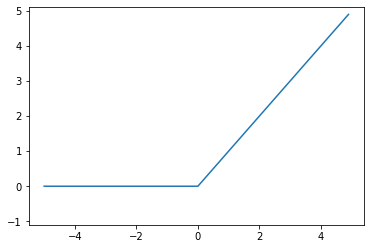

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.1, 5.1)
plt.show()

ReLU 함수 수식: 신경망의 성능이 제일 좋게 나왔다.

$$h(x) = x(x>0)$$
$$h(x) = 0(x <=0)$$

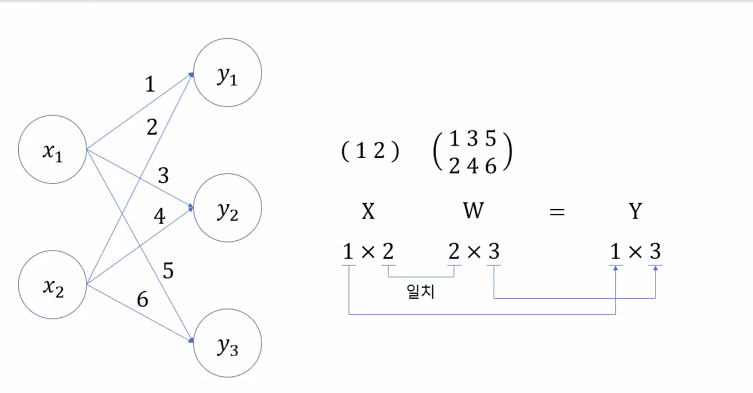

In [ ]:
X = np.array([1,2]) #대문자 X는 행렬을 뜻함
print(X.shape)

(2,)


In [ ]:
W =np.array([[1,3,5],[2,4,6]])

In [ ]:
W.shape

(2, 3)

In [ ]:
print(X)
print(W)

[1 2]
[[1 3 5]
 [2 4 6]]


In [ ]:
Y = np.dot(X,W)

In [ ]:
Y

array([ 5, 11, 17])

# 3

입력층에서 1층으로 신호전달

In [ ]:
#코딩 시작
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2,0.3])

print(W1.shape)#(2,3)
print(B1.shape) #(3,)
print(X.shape)#(2,)

A1 = np.dot(X,W1)+B1

print(np.dot(X,W1))
print(A1)

(2, 3)
(3,)
(2,)
[0.2 0.5 0.8]
[0.3 0.7 1.1]


In [ ]:
z1 = sigmoid(A1)

In [ ]:
z1

array([0.57444252, 0.66818777, 0.75026011])

y - a1*x-a0

저 값을 최소화 하기 위해 a1과 a0를 찾아야하는데 
W1 , B1 

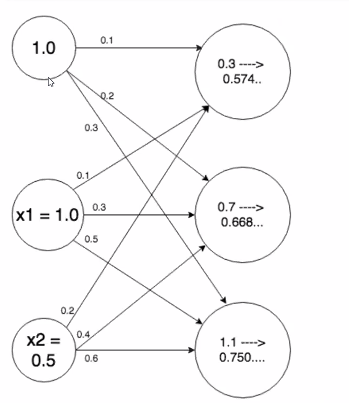

1층에서 2층으로의 신호 전달

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

In [ ]:
z1.shape

(3,)

In [ ]:
W2.shape

(3, 2)

(1,3)*(3,2) =(1,2)

In [ ]:
B2.shape

(2,)

In [ ]:
A2 = np.dot(z1, W2)+B2
z2 = sigmoid(A2)

In [ ]:
A2, z2

(array([0.51615984, 1.21402696]), array([0.62624937, 0.7710107 ]))

                                                1.0




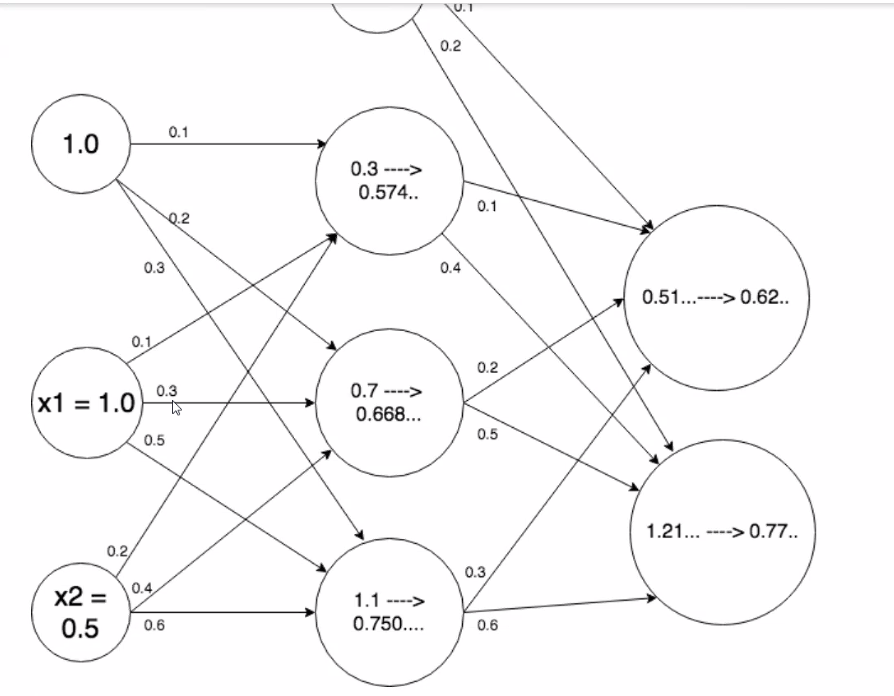

In [ ]:
def identity_function(x):
    return x
W3 = np.array([[0.1, 0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(z2, W3)+B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

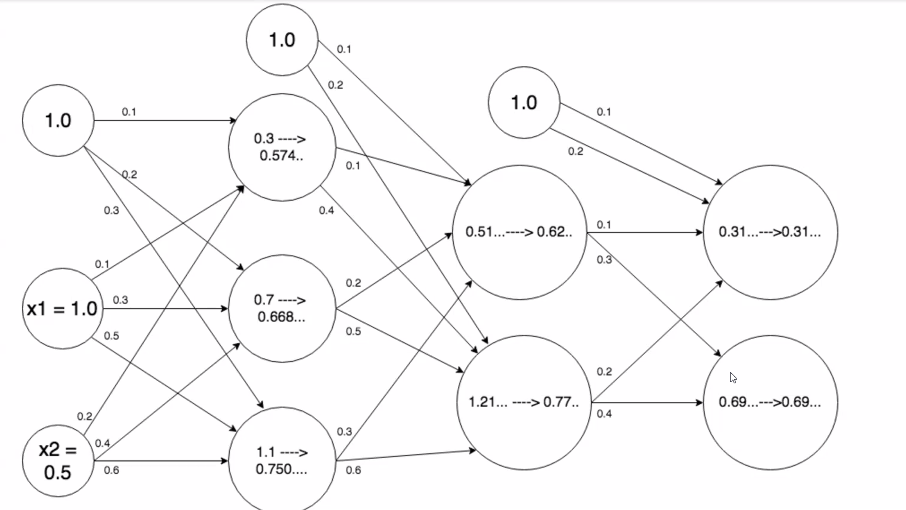

In [ ]:
def init_network(): #init_network() 함수는 가중치와 편향을 초기화 하고 이들을 딕셔너리 변수인 network에 저장합니다
    network = {}
    network['W1']= np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['b1']= np.array([0.1,0.2,0.3])
    network['W2']= np.array([[0.1,0.4], [0.2,0.5],[0.3,0.6]])
    network['b2']= np.array([0.1,0.2])
    network['W3']= np.array([[0.1,0.3], [0.2,0.4]])
    network['b3']= np.array([0.1,0.2])
    return network

def forward(network, x):    # forward() 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3

    y = identity_function(a3)
    return y
#신경망 순방향 구현

In [ ]:
x = np.array([1.0, 0.5])

In [ ]:
network = init_network()
y = forward(network,x)

In [ ]:
print(y)

[0.31682708 0.69627909]


# 4

**softmax**

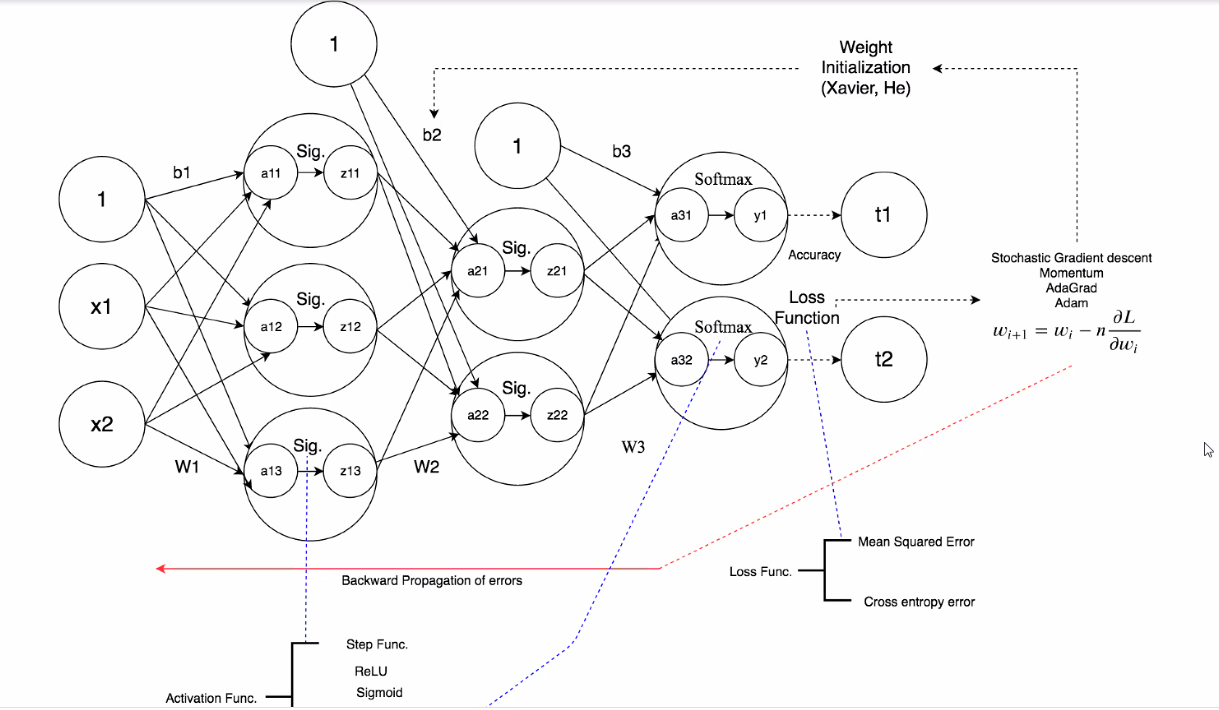

Softmax
$$
yk = exp(ak) / ∑n_i=1 exp(ai)
$$

소프트 맥스 함수가 항상 1이 되는 이유:

만약, 원소가 2개인 경우 즉, i = 1, 2 인 경우를 생각한다면,  소프트 맥수 함수의 정의에 따라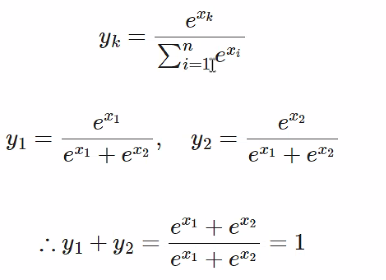

$$ x_1 = a_{31}, x_2 = a_{32}$$
$$ $$
$$ y_1 = \frac{e^{x_1}}{e^{x_1}+e^{x_2}}, \quad y_2 = \frac{e^{x_2}}{e^{x_1}+e^{x_2}} $$
$$ $$
$$ \therefore y_1 +y_2 = \frac{e^{x_1}+e^{x_2}}{e^{x_1}+ e^{x_2}} = 1 $$

In [ ]:
a = np.array([0.3,2.9,4.0])

In [ ]:
exp_a = np.exp(a)

In [ ]:
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [ ]:
sum_exp_a = np.sum(exp_a)

In [ ]:
sum_exp_a

74.1221542101633

In [ ]:
y = exp_a / sum_exp_a

In [ ]:
y

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [ ]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
y_func = softmax(a)

In [ ]:
y_func

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
np.exp(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

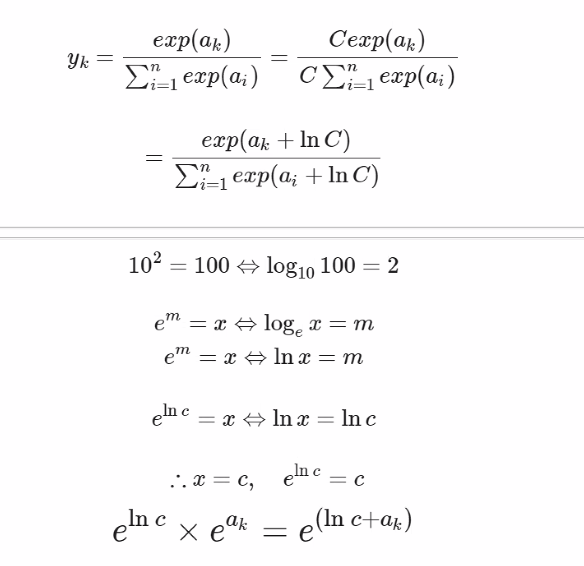

In [ ]:
a = np.array([1010, 1000, 990])

In [ ]:
np.exp(a)/ np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan, nan, nan])

In [ ]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [ ]:
np.exp(a - c)/ np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
x = np.array([2,3,4])
np.exp(x)/np.sum(np.exp(x))

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
np.exp(x-np.max(x))/np.sum(np.exp(x-np.max(x)))

array([0.09003057, 0.24472847, 0.66524096])